# Programming for Data Analysis Project

**Problem statement**

create a data set by simulating a real-world phenomenon. Then,  model and synthesise data using Python by using
the `numpy.random` package.

**Guidelines**:
    
• Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.

• Investigate the types of variables involved, their likely distributions, and their
relationships with each other.

• Synthesise/simulate a data set as closely matching their properties as possible.

• Detail your research and implement the simulation in a Jupyter notebook – them
data set itself can simply be displayed in an output cell within the notebook.


## Simulating Dublin Airport Passenger Movements in 2018

Dublin airport is the main airport in the Republic of Ireland. It was established 80 years ago. Dublin Airport officially opened at 9:00am on January 19, 1940. It was a cold Friday morning when the inaugural flight - an Aer Lingus Lockheed 14 bound for Liverpool - departed from Collinstown Airport, as it was then known.

In this assignment, I will analyse some profile of passengers that were using the airport in 2018 within one hour time frame.

Number of passengers per year: 31.5 million in 2018 [1]

Average hourly passengers calculated by dividing 31.5 (million) / 364 (days, closed for Chrismas day) which gives us 86,5 (Thousands) passengers daily on average.

Hourly Passenger Rate = 31.5 (millions) / 364 (days, closed for Chrismas day)  / 24 (hours).

Hourly Passenger Rate = 3605 

So, we can anticipate that nearly a __one passenger each second__ was using the airport

We can anticipate that there was one passenger using the airport each second.

## Importing Packages:

In [25]:
# importing numerical library
import numpy as np

rng = np.random.default_rng()

# importing library to generate data frames
import pandas as pd

# importing libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive and inline rendered plots, we use the magic command
%matplotlib inline

# Better sized plots.
plt.rcParams['figure.figsize'] = (14, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

### *DateTime* :

Generating a random array with `3600 seconds` that represents a time period of an hour in 2018.

In [26]:
# https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries
# importing datetime function from pandas
import datetime

# PCG64
rng = np.random.default_rng()

# adapted from https://stackoverflow.com/questions/50559078/generating-random-dates-within-a-given-range-in-pandas[3].

try:
    def random_dates(start, end, n=3600):
        start_u = start.value//10**9
        end_u = end.value//10**9         
        return pd.to_datetime(rng.integers(start_u, end_u, n), unit='s')
except Christmas:
    print("This is Christmas day, The Airport was closed!, Please try again")

Christmas = (2018-12-25)    
    
start = pd.to_datetime("2018-01-01")
end = pd.to_datetime("2018-12-31")

DateTime = random_dates(start, end)

In [27]:
DateTime

DatetimeIndex(['2018-11-28 08:17:27', '2018-09-12 21:43:08',
               '2018-11-12 07:00:32', '2018-07-06 23:03:11',
               '2018-07-21 10:34:12', '2018-07-31 19:51:51',
               '2018-08-06 08:49:02', '2018-08-11 06:40:52',
               '2018-09-06 13:44:51', '2018-07-19 14:23:45',
               ...
               '2018-10-31 14:51:38', '2018-08-19 20:58:44',
               '2018-09-23 00:07:39', '2018-12-22 18:58:40',
               '2018-07-20 10:03:53', '2018-08-06 15:29:18',
               '2018-08-24 01:15:28', '2018-09-22 04:47:06',
               '2018-11-15 04:36:12', '2018-01-12 06:58:43'],
              dtype='datetime64[ns]', length=3600, freq=None)

In [28]:
DateTime

DatetimeIndex(['2018-11-28 08:17:27', '2018-09-12 21:43:08',
               '2018-11-12 07:00:32', '2018-07-06 23:03:11',
               '2018-07-21 10:34:12', '2018-07-31 19:51:51',
               '2018-08-06 08:49:02', '2018-08-11 06:40:52',
               '2018-09-06 13:44:51', '2018-07-19 14:23:45',
               ...
               '2018-10-31 14:51:38', '2018-08-19 20:58:44',
               '2018-09-23 00:07:39', '2018-12-22 18:58:40',
               '2018-07-20 10:03:53', '2018-08-06 15:29:18',
               '2018-08-24 01:15:28', '2018-09-22 04:47:06',
               '2018-11-15 04:36:12', '2018-01-12 06:58:43'],
              dtype='datetime64[ns]', length=3600, freq=None)

Text(0.5, 1.0, 'A Uniform Distribution resembling number of passengers movement')

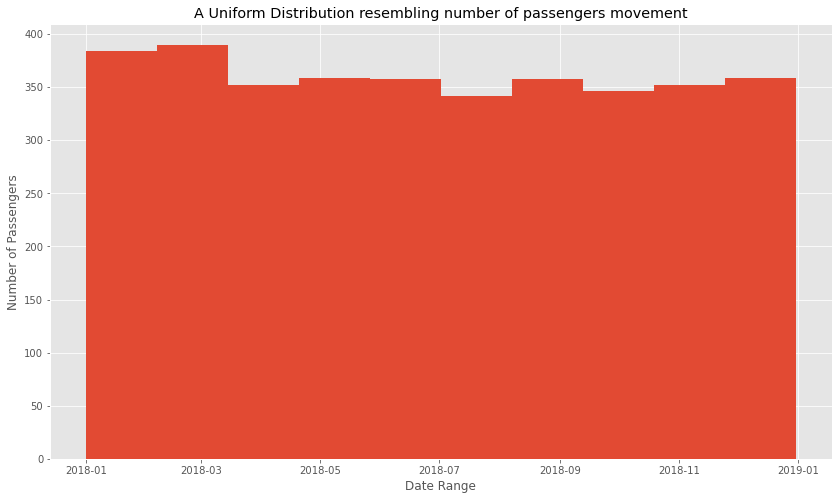

In [30]:
plt.hist(DateTime)
plt.xlabel("Date Range")
plt.ylabel("Number of Passengers")
plt.title("A Uniform Distribution resembling number of passengers movement")

***
<br>

### *Gender* :

Representaion of gender of the passengers as was reported[2]:

- __51% Male__

- __49% Female__


In [6]:
genders = ("male", "female")

p = (0.51, 0.49)

Gender = rng.choice(genders, size = 3600, p = p)

In [7]:
print("Gender Array is:", Gender)

Gender Array is: ['male' 'male' 'female' ... 'female' 'female' 'male']


Text(0.5, 1.0, 'Representation of Gender')

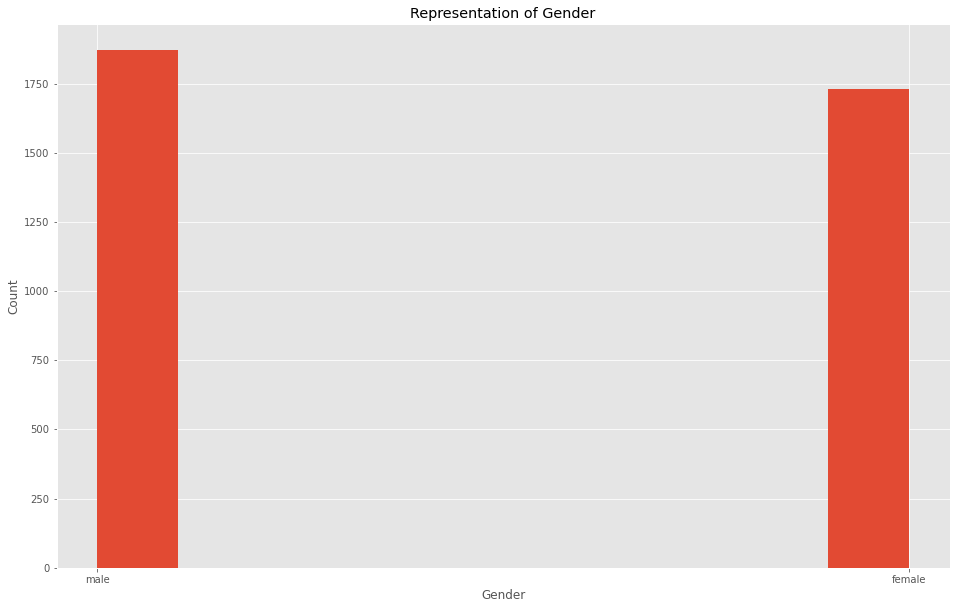

In [8]:
plt.hist(Gender)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Representation of Gender")

In [9]:
# The Gender variable is similar to a binmomial distribution.
# We could here assume that we have no prior data or representive percentage.
# 3600/2 number of Male / female per one hour.
# 3600 is number of seconds which equals a one hour period

n = 3600
p = 0.5  # probability of being Male or Female
s = rng.binomial(n, p, 3600) 

In [10]:
print("- We notice that the number of either Male or Female are matching the collection data and our modellin as per the plot above:\n", s)

- We notice that the number of either Male or Female are matching the collection data and our modellin as per the plot above:
 [1825 1857 1810 ... 1747 1765 1853]


<br>

***
<br>

### *Age* :

People of all ages pass through our doors here at Dublin Airport.

- __15%__ of our passengers are __`< 25`__

- __54%__ are between the ages of __`25-49`__

- __30%__ are aged 50 or older __`> 50`__ [2]

_Note: The total percentage doesn't mathematically correspond to 100% rate, so, there has been an adjustment on 25-49 age group which was reported to be 54%, new value assigned 55%_.

In [11]:
age_ranges = ("< 25", "25-49", "> 50")

p = (0.15, 0.55, 0.30)

Age = rng.choice(age_ranges, size = 3600, p = p)
print ("Age Array is:", Age)

Age Array is: ['< 25' '25-49' '> 50' ... '25-49' '< 25' '> 50']


Text(0.5, 1.0, 'Representation of Age')

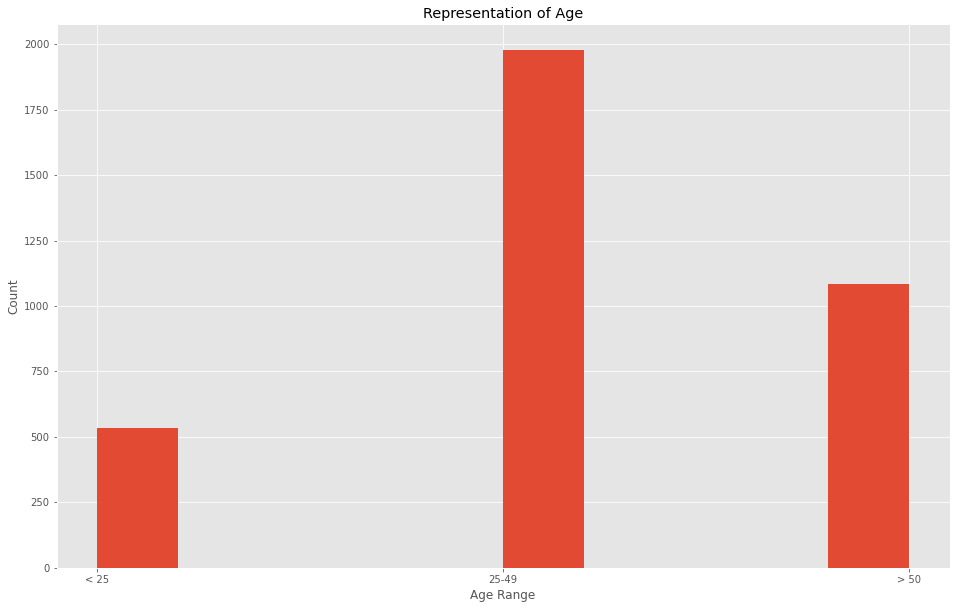

In [12]:
plt.hist(Age)
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.title("Representation of Age")

***

<br>

### *Country of Residence* :

#### Generating the `Country of Residence`  array


People from all over the world visit Dublin Airport

- __48%__ of our passengers call the Republic of Ireland their home __(IE)__

- __18%__ arrive on our shores from the UK (including NI) __(UK / NI)__

- __17%__ visit us from Continental Europe __(EUP)__

- __16%__ come from North American destinations __(N-AMR)__

- __1%__ come from the Rest of the World __(RoW)__ [2]

In [13]:
# Country of Residence: CoR

CoR = ("IE", "UK/NI", "EUP", "N-AMR", "RoW")
p = (0.48, 0.18, 0.17, 0.16, 0.01)

CoR = rng.choice(CoR, size = 3600, p = p)


In [14]:
print ("Country of Risedence Array is:", CoR)

Country of Risedence Array is: ['EUP' 'IE' 'IE' ... 'N-AMR' 'IE' 'IE']


Text(0.5, 1.0, 'Representation of Country of Risedence')

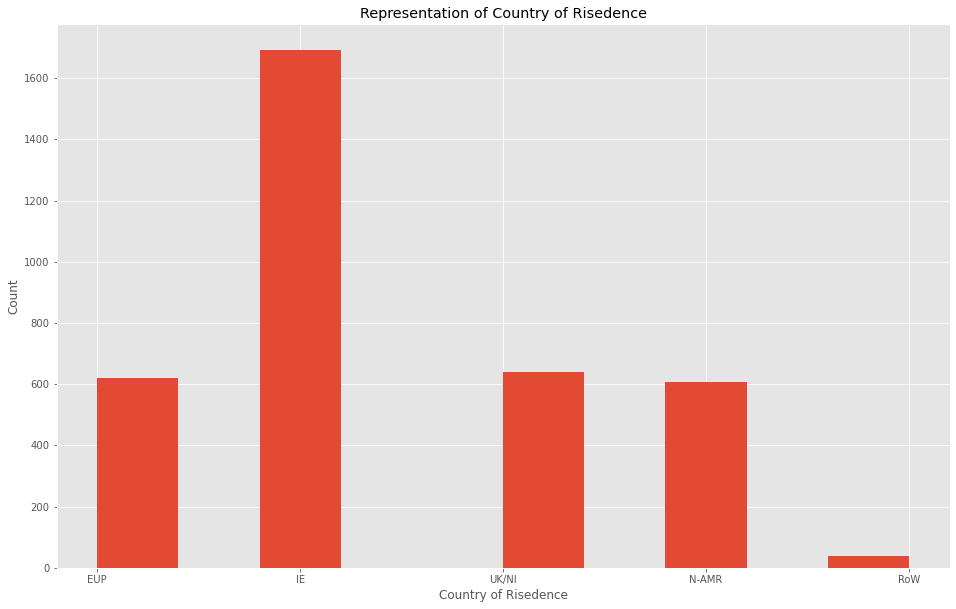

In [15]:
plt.hist(CoR)
plt.xlabel("Country of Risedence")
plt.ylabel("Count")
plt.title("Representation of Country of Risedence")

***
<br>

### *Socio-Economic Class*:

- ABC1s __71%__

- C2DEs __29%__

- Farmers __1%__ [2]

_Note: The total percentage doesn't mathematically correspond to 100% rate, so, there has been an adjustment on the ABC1s which was reported to be 71%,, new value assigned 70%_.

In [16]:
# Socio-Economic Class : SEC

SEC = ("ABC1s", "C2DEs", "Farmers")
p = (0.70, 0.29, 0.01)

SEC = rng.choice(SEC, size = 3600, p = p)


In [17]:
print (" Socio-Economic Class Array is:", SEC)

 Socio-Economic Class Array is: ['C2DEs' 'ABC1s' 'ABC1s' ... 'ABC1s' 'ABC1s' 'C2DEs']


Text(0.5, 1.0, 'Representation of Socio-Economic Class')

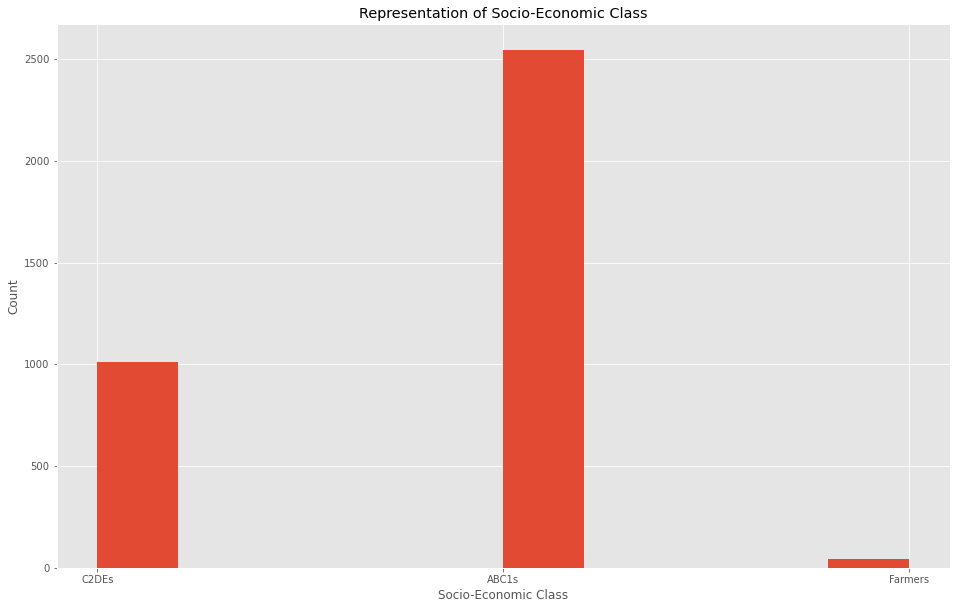

In [18]:
plt.hist(SEC)
plt.xlabel("Socio-Economic Class")
plt.ylabel("Count")
plt.title("Representation of Socio-Economic Class")

***
<br>

### Generating The Data Frame

In [19]:
df = pd.DataFrame({"DateTime" : DateTime, "Gender" : Gender, "Age" : Age, "CoR" : CoR, "SEC" : SEC})

In [20]:
df

,DateTime,Gender,Age,CoR,SEC
0,2018-08-01 14:47:08,male,< 25,EUP,C2DEs
1,2018-04-12 14:32:18,male,25-49,IE,ABC1s
2,2018-06-20 13:57:00,female,> 50,IE,ABC1s
3,2018-11-28 01:23:49,female,25-49,IE,C2DEs
4,2018-10-30 19:31:14,male,> 50,UK/NI,ABC1s
...,...,...,...,...,...
3595,2018-08-20 23:09:39,female,25-49,IE,ABC1s
3596,2018-09-14 21:20:00,male,> 50,UK/NI,C2DEs
3597,2018-08-06 19:30:52,female,25-49,N-AMR,ABC1s
3598,2018-07-10 21:31:59,female,< 25,IE,ABC1s


In [21]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
DateTime,2018-08-01 14:47:08,2018-04-12 14:32:18,2018-06-20 13:57:00,2018-11-28 01:23:49,2018-10-30 19:31:14,2018-08-30 07:55:36,2018-11-05 15:39:10,2018-01-07 20:25:33,2018-09-09 04:19:15,2018-11-06 23:45:37,...,2018-04-09 02:13:49,2018-03-23 20:24:17,2018-07-17 12:49:14,2018-04-23 20:19:22,2018-04-20 14:12:25,2018-08-20 23:09:39,2018-09-14 21:20:00,2018-08-06 19:30:52,2018-07-10 21:31:59,2018-10-07 03:03:14
Gender,male,male,female,female,male,male,female,male,female,female,...,male,female,female,male,female,female,male,female,female,male
Age,< 25,25-49,> 50,25-49,> 50,25-49,> 50,25-49,25-49,> 50,...,25-49,> 50,25-49,25-49,> 50,25-49,> 50,25-49,< 25,> 50
CoR,EUP,IE,IE,IE,UK/NI,IE,N-AMR,IE,EUP,UK/NI,...,EUP,IE,EUP,N-AMR,IE,IE,UK/NI,N-AMR,IE,IE
SEC,C2DEs,ABC1s,ABC1s,C2DEs,ABC1s,ABC1s,ABC1s,ABC1s,ABC1s,ABC1s,...,ABC1s,C2DEs,C2DEs,ABC1s,C2DEs,ABC1s,C2DEs,ABC1s,ABC1s,C2DEs


In [22]:
df.head()

,DateTime,Gender,Age,CoR,SEC
0,2018-08-01 14:47:08,male,< 25,EUP,C2DEs
1,2018-04-12 14:32:18,male,25-49,IE,ABC1s
2,2018-06-20 13:57:00,female,> 50,IE,ABC1s
3,2018-11-28 01:23:49,female,25-49,IE,C2DEs
4,2018-10-30 19:31:14,male,> 50,UK/NI,ABC1s


In [23]:
df.describe()

,DateTime,Gender,Age,CoR,SEC
count,3600,3600,3600,3600,3600
unique,3600,2,3,5,3
top,2018-08-06 22:41:09,male,25-49,IE,ABC1s
freq,1,1871,1978,1692,2544
first,2018-01-01 01:15:30,NaN,NaN,NaN,NaN
last,2018-12-30 22:42:52,NaN,NaN,NaN,NaN


In [24]:
df[::100]

,DateTime,Gender,Age,CoR,SEC
0,2018-08-01 14:47:08,male,< 25,EUP,C2DEs
100,2018-08-29 03:09:25,female,> 50,IE,ABC1s
200,2018-04-16 02:03:49,female,> 50,IE,C2DEs
300,2018-12-11 12:20:42,male,25-49,UK/NI,C2DEs
400,2018-07-26 17:46:48,female,25-49,EUP,C2DEs
500,2018-08-12 19:34:48,male,> 50,IE,ABC1s
600,2018-11-17 02:39:00,female,25-49,IE,ABC1s
700,2018-07-19 21:50:07,female,25-49,EUP,ABC1s
800,2018-10-18 20:11:42,male,25-49,IE,C2DEs
900,2018-09-14 23:24:11,female,< 25,EUP,C2DEs


## References:

[1] Dublin Airport; Facts and Figures: https://www.dublinairport.com/corporate/about-us/facts-and-figures

[2] Dublin Airport; Passenger Profile: https://www.dublinairport.com/corporate/about-us/passenger-profile

[3] caktusgroup: https://www.caktusgroup.com/blog/2020/04/15/quick-guide-generating-fake-data-with-pandas/

[4] stackoverflow: https://stackoverflow.com/questions/50559078/generating-random-dates-within-a-given-range-in-pandas

[5] https://www.hbs.edu/faculty/Publication%20Files/19-040_89360426-c7a9-4aac-95e1-a3a3db276dc8.pdf

[6] Comutational Statistics with python; Monte Carlo Methods: https://people.duke.edu/~ccc14/sta-663/MonteCarlo.html

[7] Python Health Care: https://pythonhealthcare.org/category/numpy-and-pandas/

[8] pandas; DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

## End